In [1]:
#imports
import pandas as pd
import numpy as np

In [2]:
#prints number in binary, octal, and hexadecimal
def convertNumBase(n):
    #remove the 0b from binary, 0o from octal and 0x from hexadecimal numbers
    b2 = bin(n)[2:]
    b8 = oct(n)[2:]
    b16 = hex(n)[2:]
    print(b2)
    print(b8)
    print(b16)

In [3]:
#load data
cast = pd.read_csv('data/cast.csv')

In [4]:
#counts the occurrences of each value in title and holds the values in a series then gets the element with the key Hamlet
cast['title'].value_counts()["Hamlet"]

299

In [5]:
#make a groupbyObject of all the movies
movies = cast.groupby(cast['title'])

In [6]:
#get all the Treasure Island movies data, and sort by year
movies.get_group("Treasure Island").sort_values("year")

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


In [7]:
#get all the Hamlet movies data and count the unique values in the year column, return the value from the year 1921
movies.get_group("Hamlet")['year'].value_counts()[1921]

9

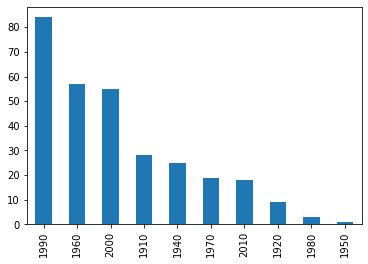

In [8]:
#get all the decades from the year coulmn of all the hamlet movies
data = movies.get_group("Hamlet")['year'] - movies.get_group("Hamlet")['year']%10
#plot the amount of times each decade is shown in data using the bar setting
df = pd.Series(data.value_counts()).plot(kind="bar")

In [9]:
#get all the movies in the 1950s
subCast = cast[cast['year']<1960][cast['year']>=1950]
#get the length of the dataframe containing all the 1950s and have n=1, and the type is actor/actress
numActors = len(subCast[subCast['n']==1][subCast['type']=="actor"].index)
numActresses = len(subCast[subCast['n']==1][subCast['type']=="actress"].index)
print("number of roles for actors",numActors,"\nnumber of roles for Actresses",numActresses)


number of roles for actors 6388 
number of roles for Actresses 2813


E:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\python\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
E:\python\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [10]:
#get a dataframe of all the movies since 1990 and have n=1 
subCast = cast[cast['year']>=1990][cast['n']==1]
#count unique names, the function returns a sorted series so we only need the 10 first values
subCast["name"].value_counts()[:10]


E:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
Name: name, dtype: int64

In [11]:
#get all the movies with frank oz
subCast = cast[cast["name"]=="Frank Oz"]
#get all the movies titles where frank oz played more than 1 role
amountPerMovie = (subCast["title"].value_counts()>1)
amountPerMovie = amountPerMovie[amountPerMovie==True]
#new dataframe to store the required data
data = pd.DataFrame(columns = subCast.columns)
#for all the movies titles where frank oz played more than 1 role append to the new dataframe
for inx in amountPerMovie.index:
    data = data.append(subCast[subCast["title"]==inx])

#group all the data by title and get only one sample per movie, then sort the data by year and get the year column
data.groupby("title").first().sort_values("year")["year"]

title
The Muppet Movie                            1979
An American Werewolf in London              1981
The Great Muppet Caper                      1981
The Dark Crystal                            1982
The Muppets Take Manhattan                  1984
Sesame Street Presents: Follow that Bird    1985
The Muppet Christmas Carol                  1992
Muppet Treasure Island                      1996
Muppets from Space                          1999
The Adventures of Elmo in Grouchland        1999
Name: year, dtype: int64